amount trades with qty<0.01 0.5506692160611855
Value counts for column: 0
Binning 0 into 40 categories...


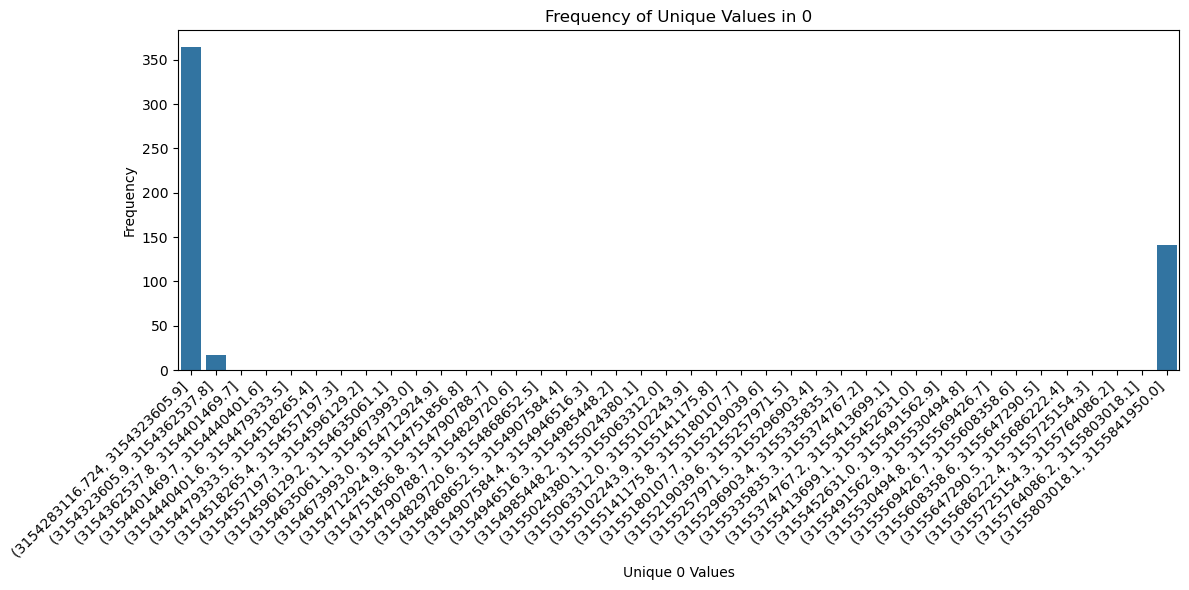

Value counts for column: price
Binning price into 40 categories...


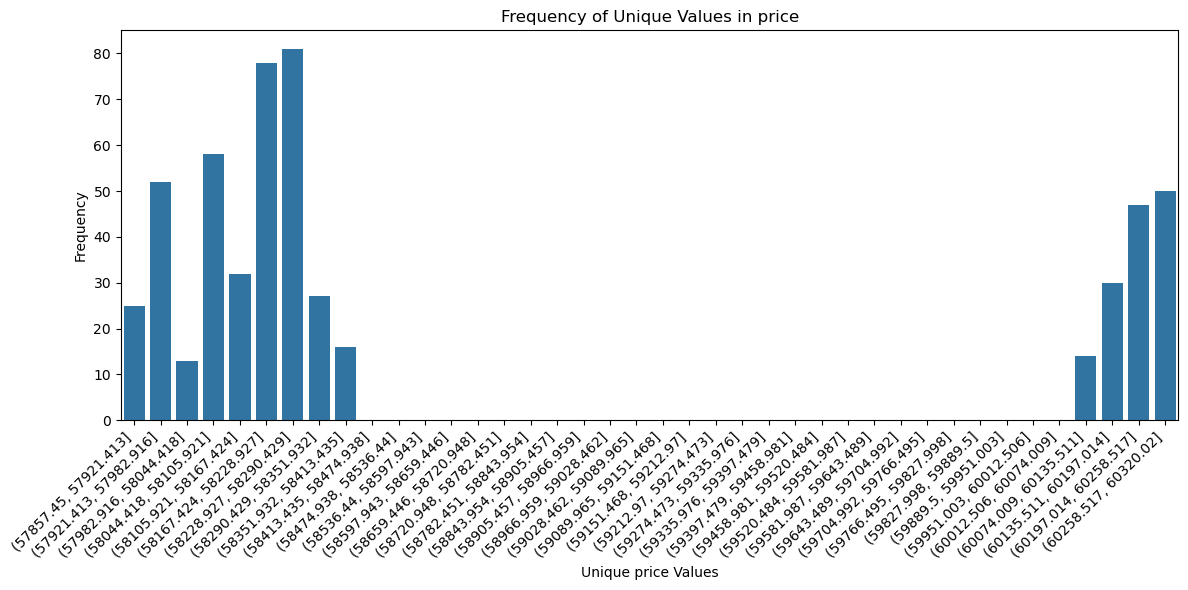

Value counts for column: qty
Binning qty into 40 categories...


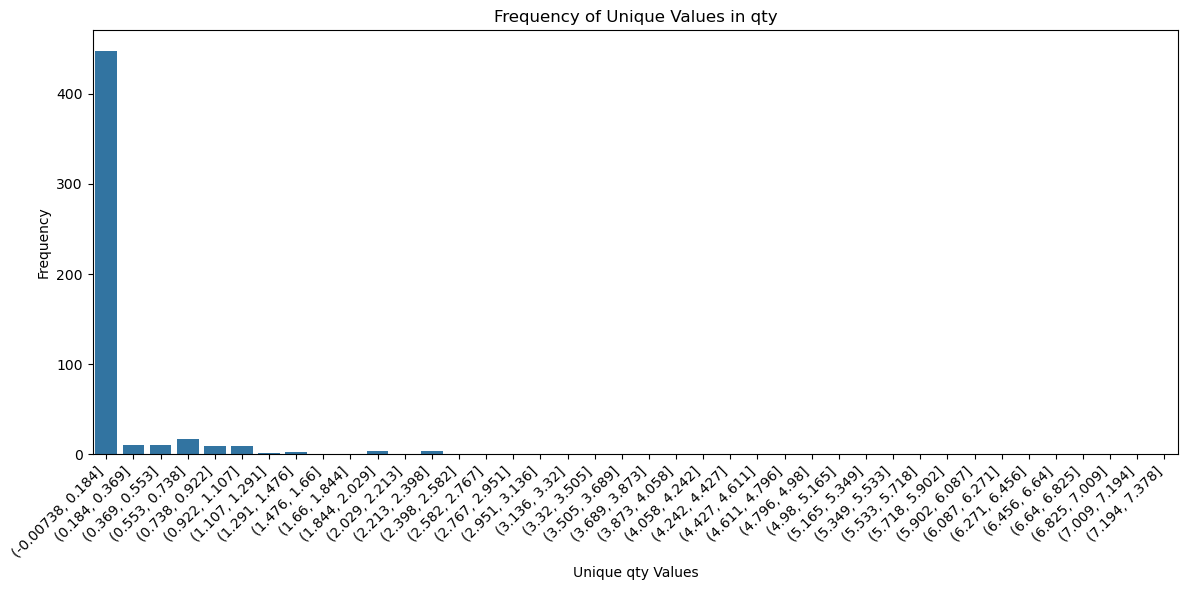

Value counts for column: 3
Binning 3 into 40 categories...


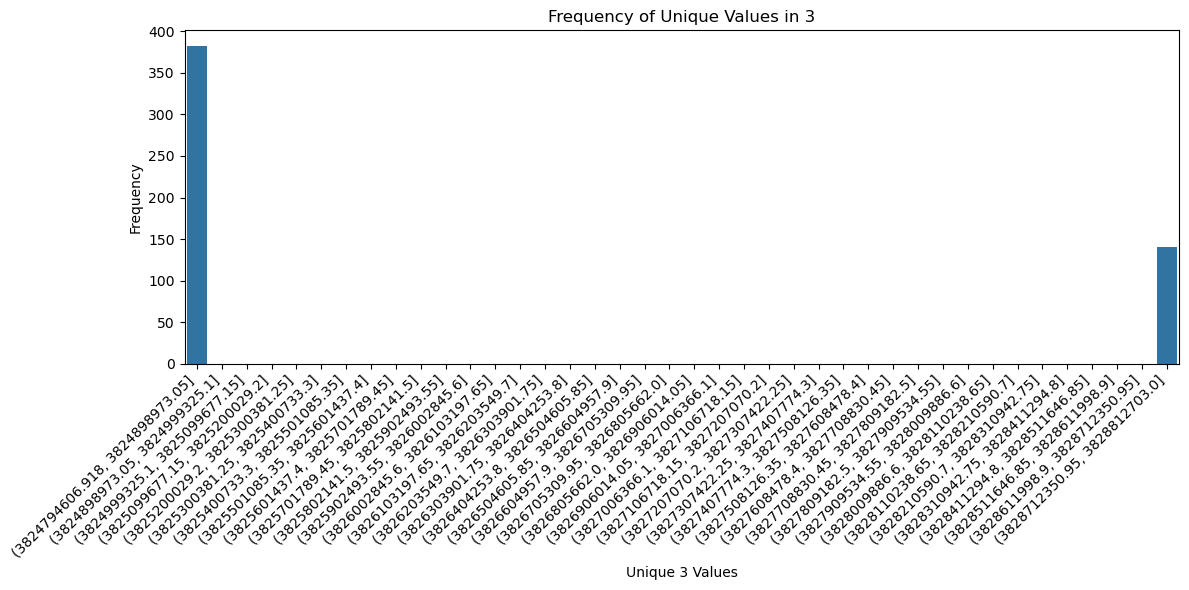

Value counts for column: 4
Binning 4 into 40 categories...


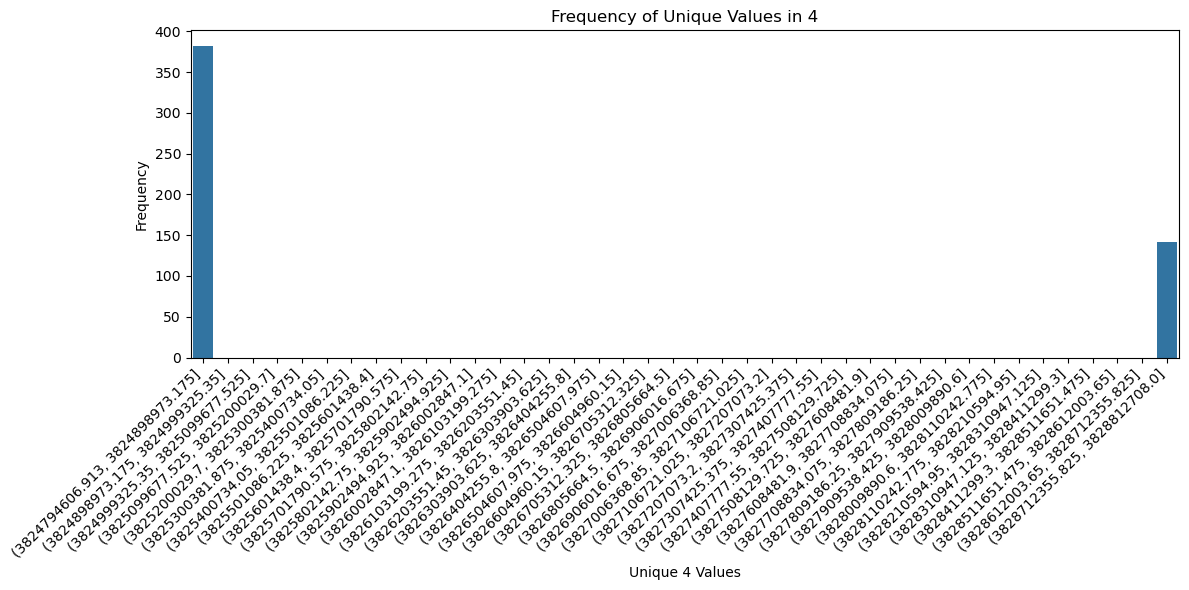

Value counts for column: 5
Binning 5 into 40 categories...


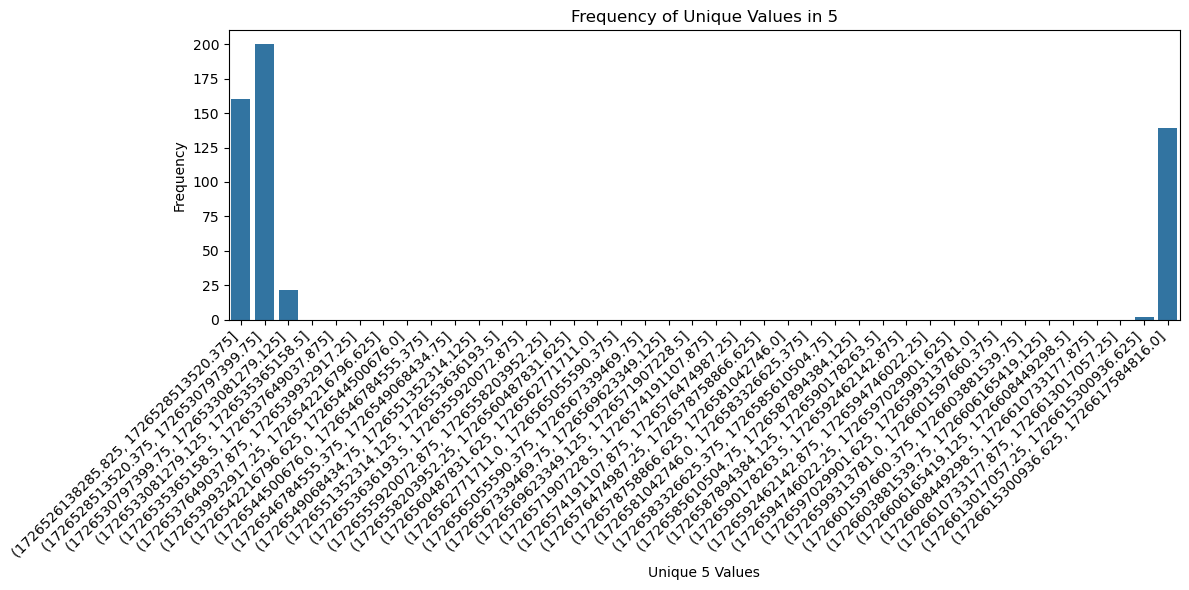

Value counts for column: isBuyerMaker


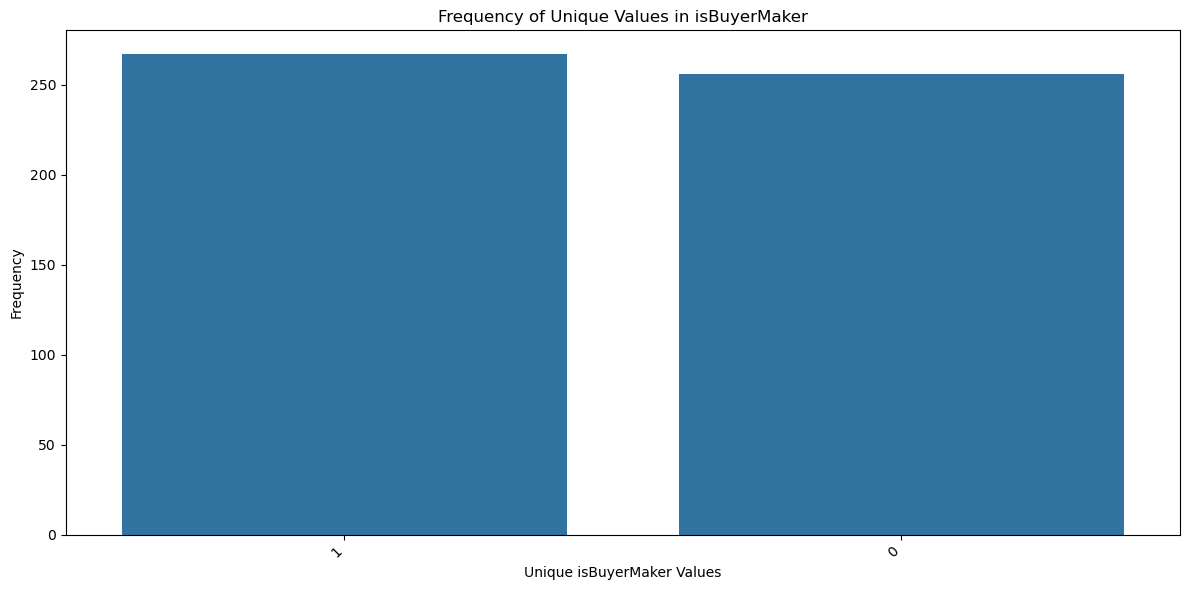

Value counts for column: isBestMatch


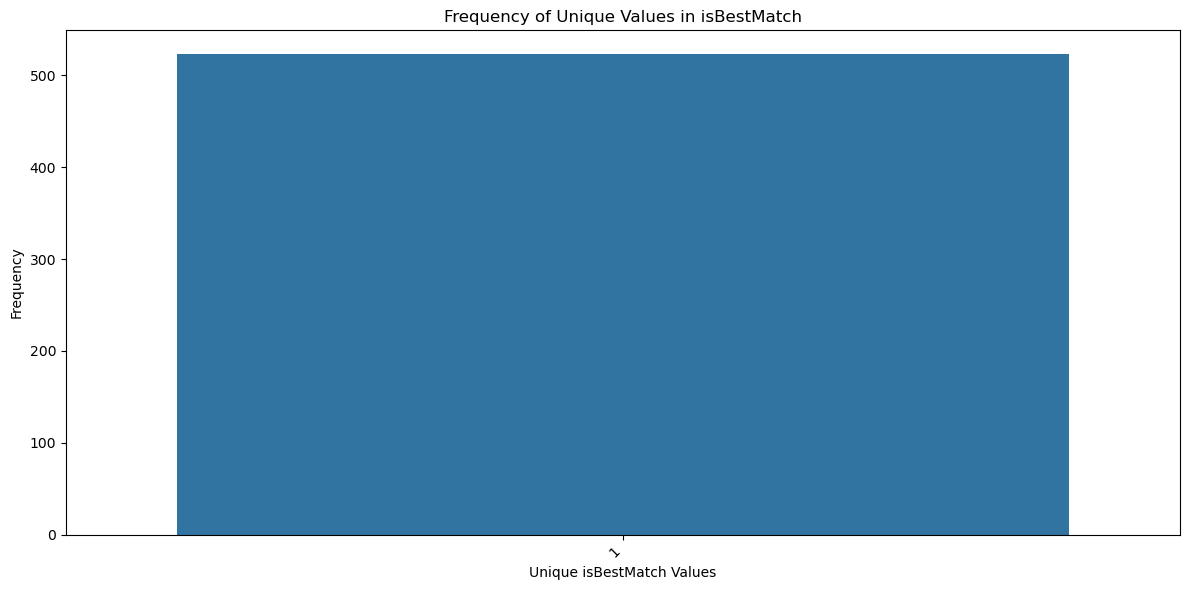

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plots are rendered in the notebook
%matplotlib inline

# Load the processed data
processed_folder = '../data/processed'
test_files = [os.path.join(processed_folder, f) for f in os.listdir(processed_folder) if f.startswith('test_')]

# Concatenate all test files into one DataFrame
test_data = pd.concat([pd.read_parquet(file) for file in test_files])

print("amount trades with qty<0.01",test_data[test_data['qty']<0.01].shape[0]/len(test_data))

# Plot frequency of each unique value as a barplot
for column in test_data.columns:
    print(f"Value counts for column: {column}")
    unique_values = test_data[column].nunique()

    # If unique values are greater than 40, create 40 bins
    if unique_values > 40:
        print(f"Binning {column} into 40 categories...")
        value_counts, bins = pd.cut(test_data[column], bins=40, retbins=True)
        value_counts = value_counts.value_counts(sort=False)
    else:
        value_counts = test_data[column].value_counts()

    # Plot frequency of each value as a barplot
    plt.figure(figsize=(12, 6))

    # Create barplot for unique values' frequency
    sns.barplot(x=value_counts.index.astype(str), y=value_counts.values)

    # Set plot title and labels
    plt.title(f"Frequency of Unique Values in {column}")
    plt.xlabel(f"Unique {column} Values")
    plt.ylabel('Frequency')

    # Rotate x-axis labels for better readability if necessary
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [2]:
print(test_files)

['../data/processed/test_BTCUSDT-aggTrades-2024-09-16.parquet', '../data/processed/test_BTCUSDT-aggTrades-2024-09-17.parquet']
